In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [7]:
df= pd.read_csv("C:/Users/91814/Downloads/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [13]:
df.shape

(1303, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [17]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [33]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [23]:
df=df.dropna()
df.isnull().sum()



Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [35]:
df.duplicated().sum()

0

<Axes: xlabel='Ram', ylabel='count'>

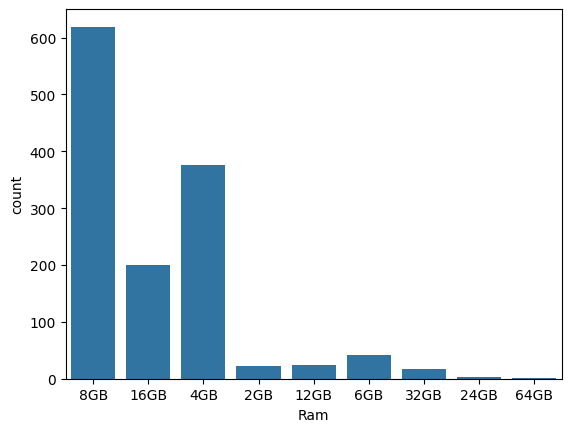

In [41]:
sns.countplot(df,x=df['Ram'])



C:\Users\91814\AppData\Local\Temp\ipykernel_41372\4044657617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Company'], palette='rainbow')


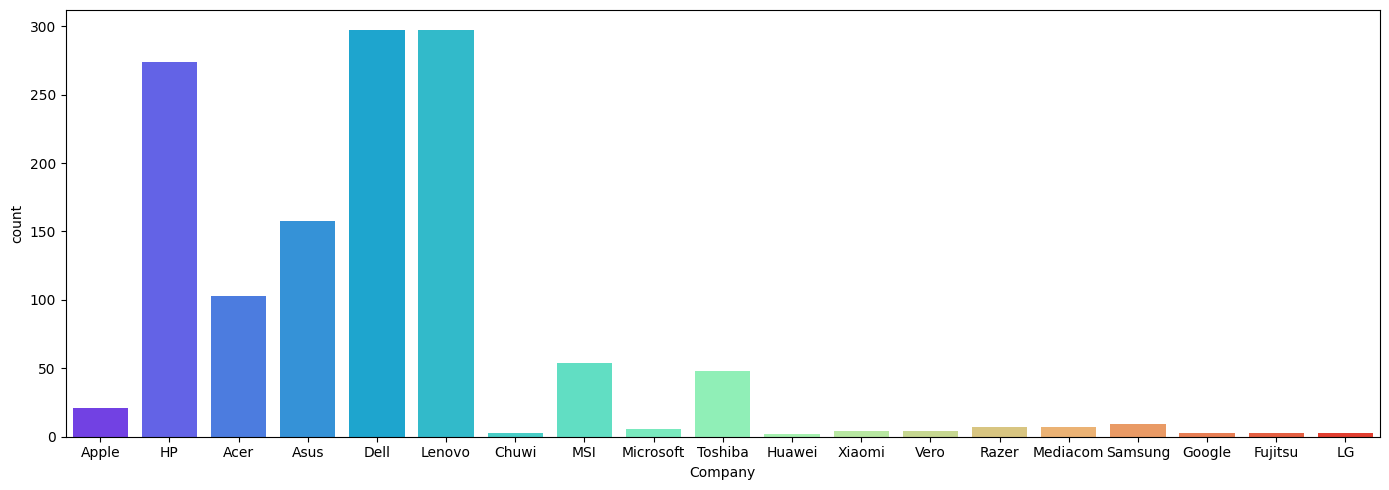

In [43]:
plt.figure(figsize=(14, 5))
sns.countplot(x=df['Company'], palette='rainbow')
plt.tight_layout()
plt.show()


C:\Users\91814\AppData\Local\Temp\ipykernel_41372\396837662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['OpSys'], palette='rainbow')


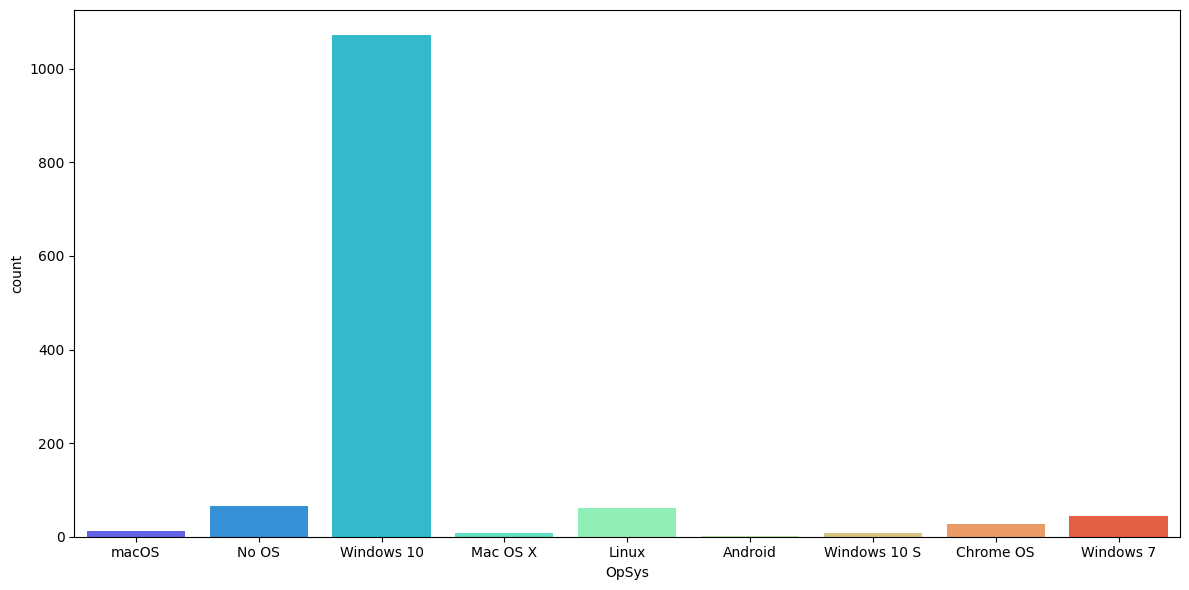

In [53]:
plt.figure(figsize =(12, 6))
sns.countplot(x=df['OpSys'], palette='rainbow')
plt.tight_layout()
plt.show()


C:\Users\91814\AppData\Local\Temp\ipykernel_41372\3522053975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TypeName'], palette='rainbow')


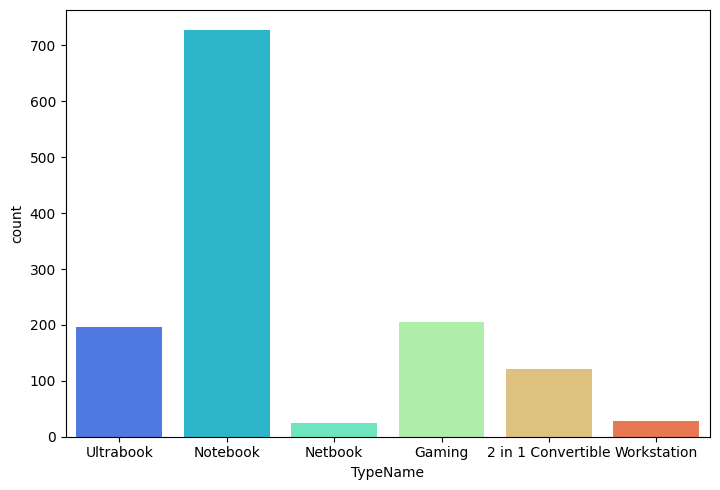

In [45]:
plt.figure(figsize=(7.3, 5))
sns.countplot(x=df['TypeName'], palette='rainbow')
plt.tight_layout()
plt.show()


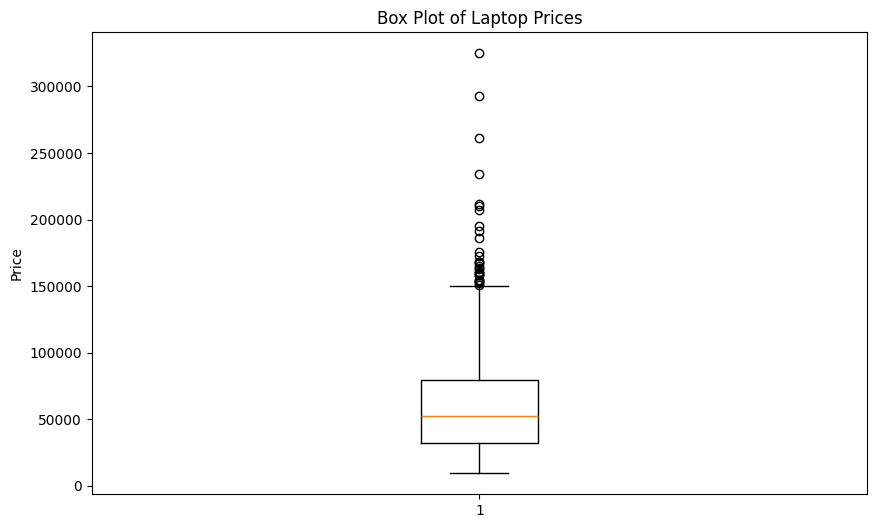

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Box Plot of Laptop Prices')  # Corrected title
plt.ylabel('Price')  # 'Price' should be a string
plt.show()


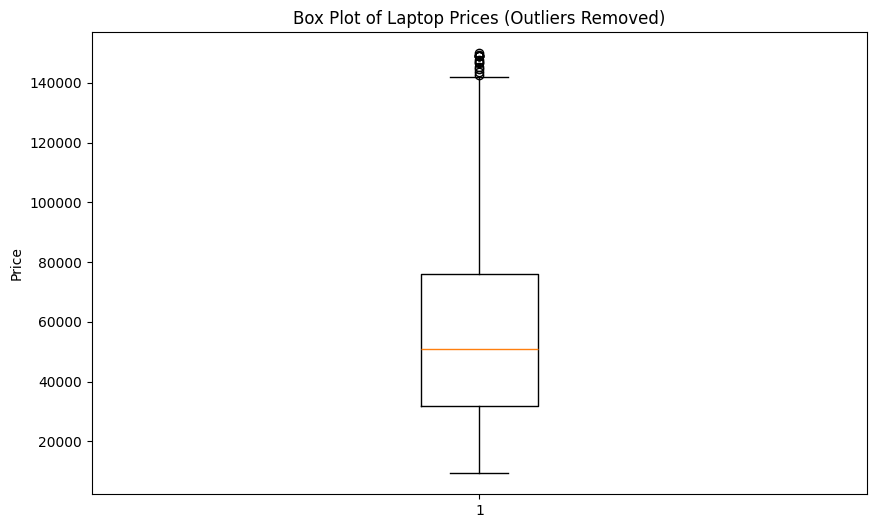

In [65]:
import matplotlib.pyplot as plt

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR  # Corrected the upper bound calculation

# Filter the DataFrame to remove outliers
df_new = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Create a boxplot for the filtered data
plt.figure(figsize=(10, 6))
plt.boxplot(df_new['Price'])
plt.title('Box Plot of Laptop Prices (Outliers Removed)')
plt.ylabel('Price')
plt.show()


In [69]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
catcol = [
    'Company', 'TypeName', 'ScreenResolution', 'Cpu', 
    'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'
]

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply the LabelEncoder to each column in catcol
for col in catcol:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,13.3,23,65,8,4,58,8,38,71378.6832
1,1,1,4,13.3,1,63,8,2,51,8,35,47895.5232
2,2,7,3,15.6,8,74,8,16,53,4,74,30636.0000
3,3,1,4,15.4,25,85,1,29,9,8,71,135195.3360
4,4,1,4,13.3,23,67,8,16,59,8,38,96095.8080


In [73]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
x = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (1107, 11) (1107,)
Testing set shape: (196, 11) (196,)


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Output predictions
print("Training Predictions:", y_train_pred)
print("Testing Predictions:", y_test_pred)


Training Predictions: [17190.126    33143.394096 58724.113104 ... 29408.977584 45808.188624
 26489.489328]
Testing Predictions: [ 67803.51528   80139.694752  28929.382992  53406.11376   76883.769936
  77899.633056  37150.002144  32012.398224  70068.171024  16845.88392
  80039.043504  40556.506896  83569.221792  40141.0188    99166.515552
  52654.940352  73862.064     53423.024832  57152.544912 108056.04912
 131554.82016   39039.529392  61880.953104  15149.800368  50576.556816
  53334.553392  37909.220832  37285.818192  84566.60208   55004.535072
  26515.442016  98113.702752  83710.088784  47106.947232  52018.393536
  49057.714512  42584.008032  25721.0532    64326.094848  13381.69824
  92701.3392    35951.937408  55230.010704 124191.92376   34812.091728
  54477.515952  88342.566336  13117.8024    48371.665248  79039.462752
  84954.938688  38380.338576  45507.241872  66357.586656  55397.629584
  73974.010608  11965.83552   44267.144544  53211.465936  53262.25776
  52324.18344   47955.50

In [81]:
from sklearn.metrics import r2_score

# Calculate R² score for training and testing predictions
model_train_r2 = r2_score(y_train, y_train_pred)
model_test_r2 = r2_score(y_test, y_test_pred)

# Print the R² scores
print("Training R² Score: ", model_train_r2)
print("Testing R² Score: ", model_test_r2)


Training R² Score:  0.9747297042743667
Testing R² Score:  0.8297515291444093


C:\Users\91814\AppData\Local\Temp\ipykernel_41372\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

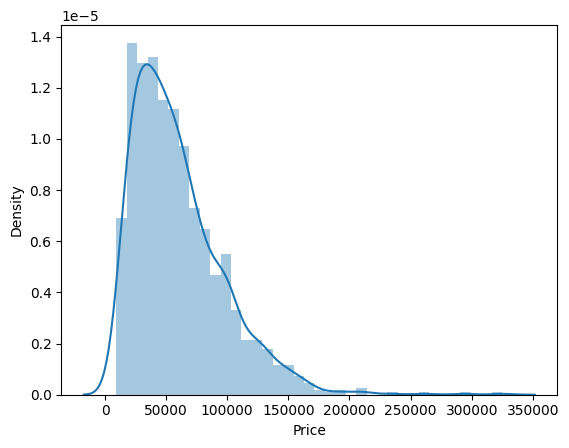

In [83]:
sns.distplot(df['Price'])

In [89]:
# Convert the 'Weight' column to numeric by removing 'kg'
df['Weight'] = df['Weight'].str.replace('kg', '')  # Remove 'kg'
df['Weight'] = df['Weight'].astype(float)  # Convert to float


Training R² Score:  0.9748132882234257
Testing R² Score:  0.8342395029037213


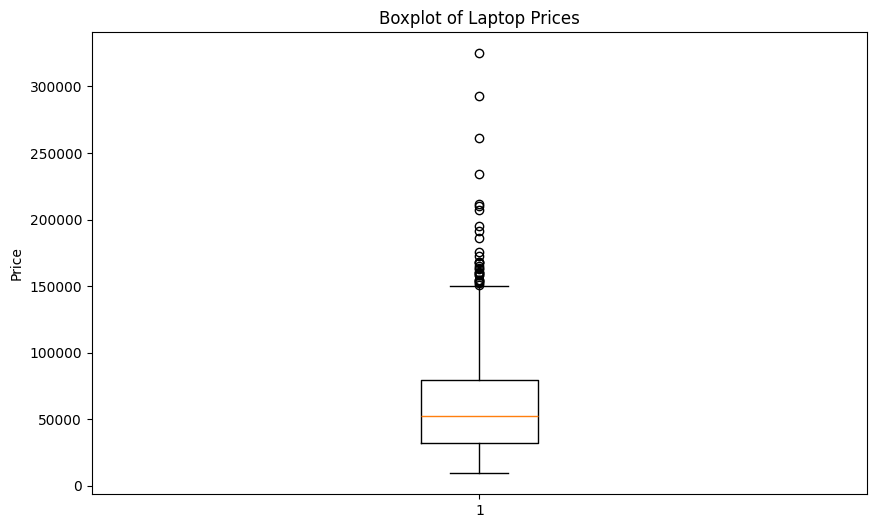

In [91]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('laptop_data.csv')  # Replace with your dataset's path

# Step 2: Preprocess the data
# Convert the 'Weight' column to numeric
df['Weight'] = df['Weight'].str.replace('kg', '')  # Remove 'kg'
df['Weight'] = df['Weight'].astype(float)  # Convert to float

# Encode categorical columns
catcol = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']
encoder = LabelEncoder()
for col in catcol:
    df[col] = encoder.fit_transform(df[col])

# Step 3: Split the data into features (X) and target (y)
X = df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = df['Price']  # Target (Price)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 5: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 7: Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training R² Score: ", train_r2)
print("Testing R² Score: ", test_r2)

# Visualize the Price column to check for outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Boxplot of Laptop Prices')
plt.ylabel('Price')
plt.show()
